<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Test-auto.arima-on-simulated-data" data-toc-modified-id="Test-auto.arima-on-simulated-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Test <code>auto.arima</code> on simulated data</a></span></li><li><span><a href="#Test-auto.arima-on-real-data" data-toc-modified-id="Test-auto.arima-on-real-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Test <code>auto.arima</code> on real data</a></span><ul class="toc-item"><li><span><a href="#A-subset-of-time-series" data-toc-modified-id="A-subset-of-time-series-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>A subset of time series</a></span></li><li><span><a href="#All-data" data-toc-modified-id="All-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>All data</a></span><ul class="toc-item"><li><span><a href="#Parallel" data-toc-modified-id="Parallel-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Parallel</a></span><ul class="toc-item"><li><span><a href="#No-parameter-specified" data-toc-modified-id="No-parameter-specified-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>No parameter specified</a></span></li><li><span><a href="#Specify-parameters" data-toc-modified-id="Specify-parameters-2.2.1.2"><span class="toc-item-num">2.2.1.2&nbsp;&nbsp;</span>Specify parameters</a></span></li></ul></li><li><span><a href="#Single-cpu" data-toc-modified-id="Single-cpu-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Single cpu</a></span></li></ul></li></ul></li></ul></div>

In [1]:
print(R.version)
file.path(R.home("bin"), "R")

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          3.0                         
year           2023                        
month          04                          
day            21                          
svn rev        84292                       
language       R                           
version.string R version 4.3.0 (2023-04-21)
nickname       Already Tomorrow            


[1] "/software/R/4.3.0/lib64/R/bin/R"

In [2]:
.libPaths()

[1] "/home/kzy816/R/x86_64-pc-linux-gnu-library/4.3"
[2] "/hpc/software/R/4.3.0/lib64/R/library"

In [26]:
# detach("package:AFTSCode", unload = TRUE) # First detach the package
# unloadNamespace("AFTSCode")

In [28]:
library(AFTSCode)

# Test `auto.arima` on simulated data

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



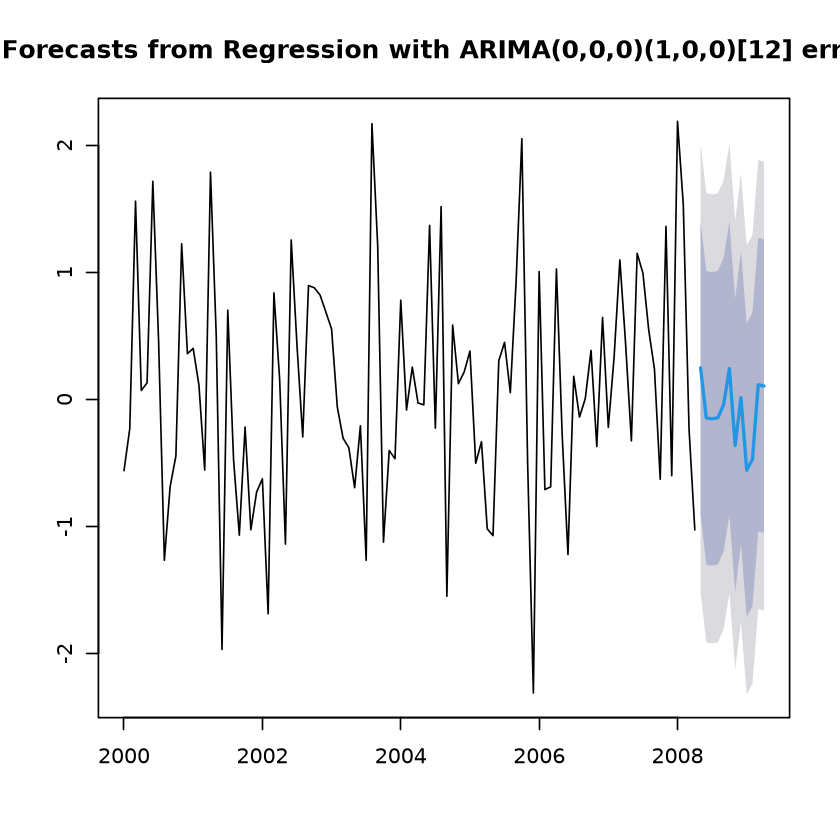

In [3]:
# Assuming 'forecast' package is installed and loaded
library(forecast)

# Simulate some time series data
set.seed(123)
ts_data <- ts(rnorm(100), frequency = 12, start = c(2000, 1))

# Simulate exogenous regressor data for model fitting
xreg_train <- matrix(rnorm(200), ncol = 2) # Two exogenous regressors

# Fit an ARIMA model with exogenous regressors
# fit <- auto.arima(ts_data, xreg = xreg_train)
fit <- auto.arima(ts_data, xreg = xreg_train)

# Simulate future values of the exogenous regressors for forecasting
xreg_future <- matrix(rnorm(24), ncol = 2) # Two exogenous regressors for 12 future periods

# Forecast using the model and future values of exogenous regressors
forecast_result <- forecast(fit, xreg = xreg_future)

# Plot the forecast
par(bg = 'white')
plot(forecast_result)

[1] 76
2004.25 ; 2008.333

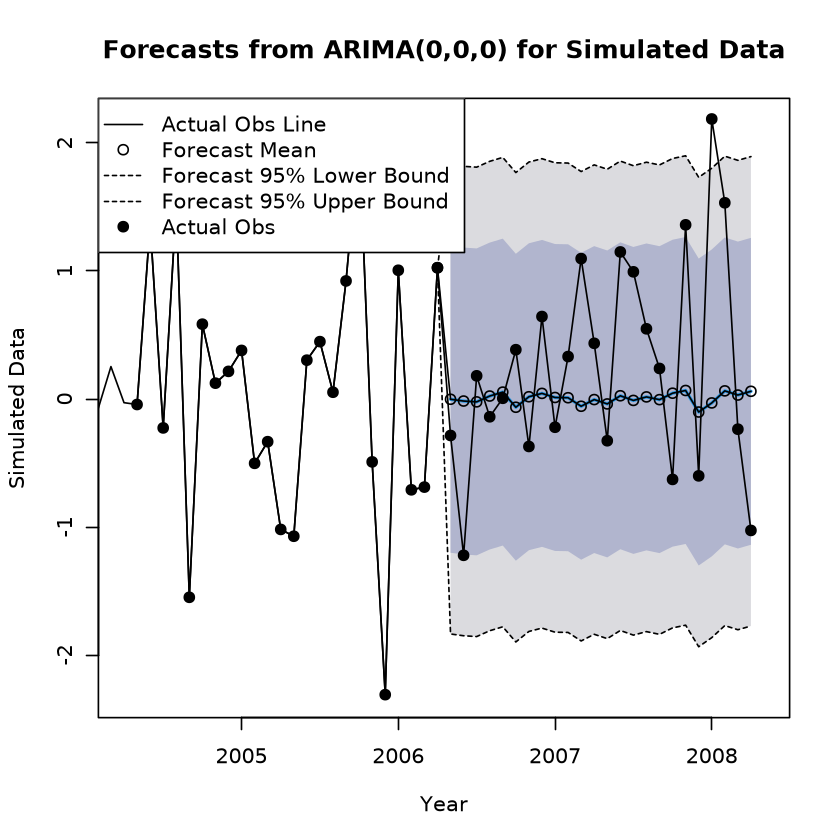

In [8]:
npts = 24
eotr = length(ts_data)-npts
h = npts
freq = 12
xreg = xreg_train
sub_ew_vanilla_fc_res = plot_auto_arima_forecast_fig(
    da_ts=ts_data, eotr=eotr, h=h, npts=npts, frequency=freq, 
    xreg=xreg,
    main="Forecasts from ARIMA(0,0,0) for Simulated Data", 
    xlab="Year", ylab="Simulated Data"# , ylim=c(5, 11)
)

# Test `auto.arima` on real data

In [9]:
lib_dir = "/home/kzy816/R/x86_64-pc-linux-gnu-library/4.3/"

In [4]:
# install.packages("sandwich", lib = lib_dir)

In [10]:
require(xts)
require(sandwich)
require(lmtest)
require(forecast)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: lmtest



In [11]:
da = read.table("../AFTS_sol/data/d-ibm3dxwkdays8008.txt", header = T)
da[1:5,]

,year,mom,day,ibm,vw,ew,sp,M,T,W,R,F
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1980,1,2,-0.029126,-0.020089,-0.011686,-0.020196,0,0,1,0,0
2,1980,1,3,0.016000,-0.006510,-0.011628,-0.005106,0,0,0,1,0
3,1980,1,4,-0.001969,0.013735,0.015809,0.012355,0,0,0,0,1
4,1980,1,7,-0.003945,0.004368,0.007013,0.002722,1,0,0,0,0
5,1980,1,8,0.067327,0.019340,0.014152,0.020036,0,1,0,0,0


In [12]:
ew = da$ew * 100
ew_ts = ts(ew, frequency = 252, start = c(1980, 1, 2))

In [13]:
help(auto.arima)

## A subset of time series

In [14]:
da[6560:6570,]; da[6812:6822,]

,year,mom,day,ibm,vw,ew,sp,M,T,W,R,F
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
6560,2005,12,23,0.003124,0.000981,0.003363,0.000426,0,0,0,0,1
6561,2005,12,27,-0.005870,-0.009806,-0.007569,-0.009553,0,1,0,0,0
6562,2005,12,28,0.000603,0.002857,0.003299,0.001297,0,0,1,0,0
6563,2005,12,29,-0.007707,-0.002343,0.000072,-0.002981,0,0,0,1,0
6564,2005,12,30,-0.002427,-0.004415,0.000053,-0.004887,0,0,0,0,1
6565,2006,1,3,-0.001703,0.016428,0.010981,0.016430,0,1,0,0,0
6566,2006,1,4,-0.001340,0.005531,0.007697,0.003673,0,0,1,0,0
6567,2006,1,5,0.006711,-0.000332,0.002920,0.000016,0,0,0,1,0
6568,2006,1,6,0.029697,0.009813,0.009032,0.009399,0,0,0,0,1


,year,mom,day,ibm,vw,ew,sp,M,T,W,R,F
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
6812,2006,12,26,0.004305,0.004329,0.004140,0.004352,0,1,0,0,0
6813,2006,12,27,0.016099,0.007789,0.008718,0.007015,0,0,1,0,0
6814,2006,12,28,-0.002366,-0.001034,-0.000479,-0.001479,0,0,0,1,0
6815,2006,12,29,0.001856,-0.004519,-0.001187,-0.004513,0,0,0,0,1
6816,2007,1,3,0.001235,-0.001349,-0.000143,-0.001199,0,0,1,0,0
6817,2007,1,4,0.010692,0.000605,0.000588,0.001228,0,0,0,1,0
6818,2007,1,5,-0.009053,-0.007231,-0.009794,-0.006085,0,0,0,0,1
6819,2007,1,8,0.015192,0.002559,0.001731,0.002220,1,0,0,0,0
6820,2007,1,9,0.011830,-0.000023,0.000276,-0.000517,0,1,0,0,0


In [15]:
sub_ew_ts = ts(ew[6565:length(ew)], frequency = 252, start = c(2006, 1, 3))
sub_da = da[6565:length(ew),]
length(sub_ew_ts)

[1] 755

In [16]:
sub_ts_fm <- auto.arima(
    sub_ew_ts,
    d = 0,
    D = 0,
    max.p = 2,
    max.q = 2,
    max.P = 1,
    max.Q = 0,
    max.order = 5,
    seasonal = TRUE,
    method = "ML",
    allowmean = TRUE,
    xreg = as.matrix(sub_da[, 8:11]),
    stepwise = FALSE,
    parallel = TRUE,
    num.cores = 6
)
sub_ts_fm

Series: sub_ew_ts 
Regression with ARIMA(2,0,2) errors 

Coefficients:
          ar1      ar2     ma1     ma2        M       T        W       R
      -0.9976  -0.6214  1.0519  0.5740  -0.2183  0.0709  -0.0023  -0.060
s.e.   0.2445   0.2018  0.2520  0.2289   0.1147  0.1108   0.1099   0.111

sigma^2 = 2.013:  log likelihood = -1331.43
AIC=2680.87   AICc=2681.11   BIC=2722.51

[1] 734
2008.833 ; 2008.996

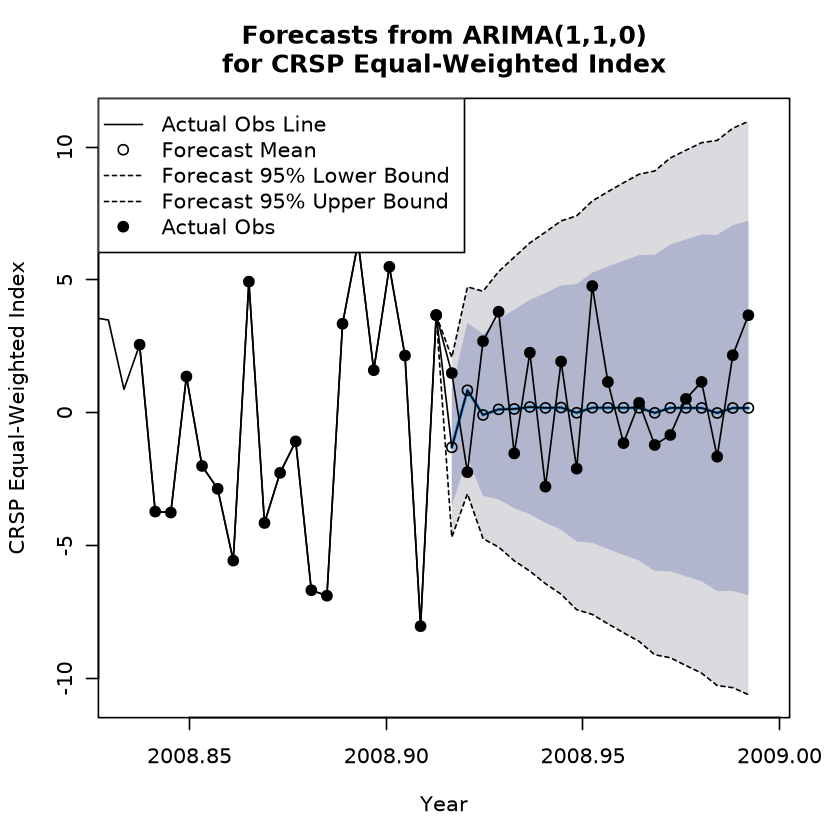

In [17]:
npts = 20
eotr = length(sub_ew_ts)-npts
h = npts
freq = 252
xreg = as.matrix(sub_da[, 8:11])
sub_ew_vanilla_fc_res = plot_auto_arima_forecast_fig(
    da_ts=sub_ew_ts, eotr=eotr, h=h, npts=npts, frequency=freq, 
    xreg=xreg,
    main="Forecasts from ARIMA(1,1,0)\nfor CRSP Equal-Weighted Index", 
    xlab="Year", ylab="CRSP Equal-Weighted Index"# , ylim=c(5, 11)
)

In [18]:
sub_ew_fc_tb = comb_forecast_res(sub_ew_vanilla_fc_res, sub_ew_ts, eotr, freq)
sub_ew_fc_tb


Forecast method: Regression with ARIMA(1,1,0) errors

Model Information:
Series: tr_da_ts 
Regression with ARIMA(1,1,0) errors 

Coefficients:
          ar1    drift     xreg
      -0.4319  -0.0011  -0.1894
s.e.   0.0343   0.0444   0.1196

sigma^2 = 2.983:  log likelihood = -1441.2
AIC=2890.39   AICc=2890.45   BIC=2908.79

Error measures:
                        ME     RMSE      MAE      MPE     MAPE     MASE
Training set -0.0001707146 1.722408 1.026185 128.2297 323.7154 0.850973
                   ACF1
Training set -0.1714507

Forecasts:
         Point Forecast     Lo 80     Hi 80      Lo 95     Hi 95
2008.917   -1.298624463 -3.512011 0.9147619  -4.683707  2.086458
2008.921    0.849334056 -1.696299 3.3949670  -3.043876  4.742544
2008.925   -0.079878948 -3.124575 2.9648171  -4.736340  4.576582
2008.929    0.130539853 -3.260069 3.5211483  -5.054948  5.316028
2008.933    0.145715474 -3.590326 3.8817573  -5.568067  5.859498
2008.937    0.219419115 -3.819953 4.2587911  -5.958267  6.397105

A Time Series:
 [1] -1.298624463  0.849334056 -0.079878948  0.130539853  0.145715474
 [6]  0.219419115  0.186057742  0.198936766  0.002474672  0.193378414
[11]  0.191186694  0.190603831  0.189326118 -0.001021811  0.187241279
[16]  0.186190032  0.185114609 -0.005320687  0.182980137  0.181912593

A Time Series:
 [1] 1.727115 1.986368 2.375789 2.645706 2.915249 3.151939 3.376055 3.584563
 [9] 3.782258 3.969847 4.149076 4.320830 4.486033 4.645356 4.799397 4.948643
[17] 5.093519 5.234386 5.371561 5.505318

A Time Series:
 [1]  1.4960 -2.2343  2.6950  3.8066 -1.5286  2.2634 -2.7784  1.9321 -2.1021
[10]  4.7713  1.1627 -1.1401  0.3764 -1.2094 -0.8332  0.5254  1.1629 -1.6514
[19]  2.1692  3.6731

,Forecast,Std. Error,Actual
2008.917,-1.298624463,1.727115,1.4960
2008.921,0.849334056,1.986368,-2.2343
2008.925,-0.079878948,2.375789,2.6950
2008.929,0.130539853,2.645706,3.8066
2008.933,0.145715474,2.915249,-1.5286
2008.937,0.219419115,3.151939,2.2634
2008.940,0.186057742,3.376055,-2.7784
2008.944,0.198936766,3.584563,1.9321
2008.948,0.002474672,3.782258,-2.1021
2008.952,0.193378414,3.969847,4.7713


## All data

### Parallel

In [19]:
ts_fm <- auto.arima(
    ew_ts,
    d = 0,
    D = 0,
    max.p = 2,
    max.q = 2,
    max.P = 1,
    max.Q = 0,
    max.order = 5,
    seasonal = TRUE,
    method = "ML",
    allowmean = TRUE,
    xreg = as.matrix(da[, 8:11]),
    stepwise = FALSE,
    parallel = TRUE,
    num.cores = 12
)
ts_fm

Series: ew_ts 
Regression with ARIMA(2,0,2) errors 

Coefficients:
         ar1     ar2      ma1      ma2  intercept        M        T        W
      0.6224  0.2507  -0.4249  -0.3517     0.2250  -0.3181  -0.1989  -0.1059
s.e.  0.0948  0.0685   0.0931   0.0551     0.0243   0.0275   0.0291   0.0293
            R
      -0.0997
s.e.   0.0271

sigma^2 = 0.6429:  log likelihood = -8764.09
AIC=17548.19   AICc=17548.22   BIC=17617.17

#### No parameter specified

[1] 7299
2008.881 ; 2009.044

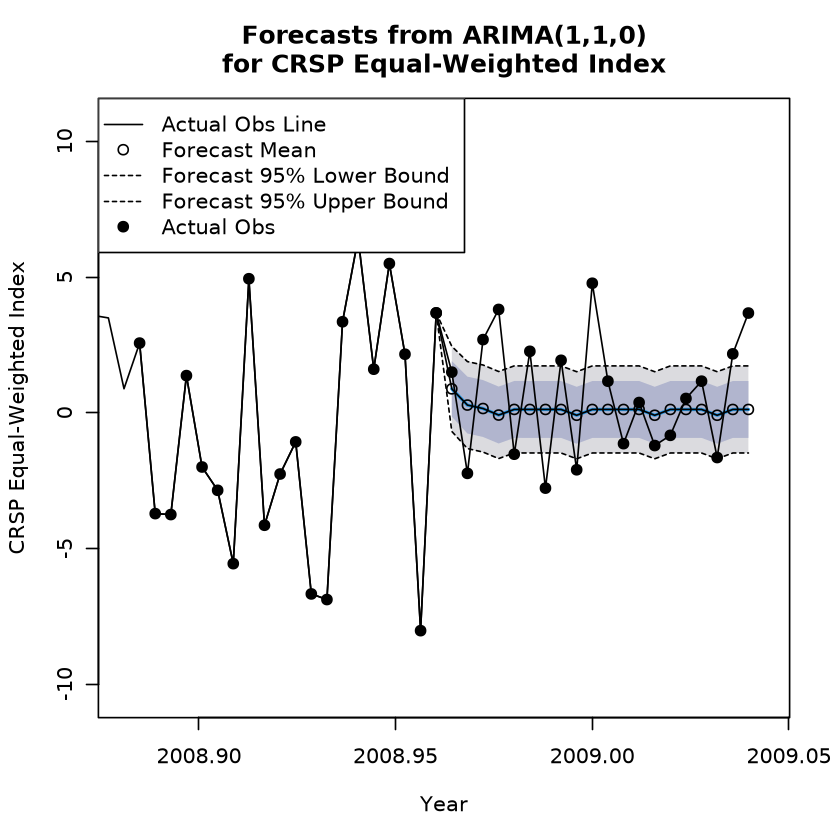

In [20]:
npts = 20
eotr = length(ew_ts)-npts
h = npts
freq = 252
xreg = as.matrix(da[, 8:11])
ew_vanilla_fc_res = plot_auto_arima_forecast_fig(
    da_ts=ew_ts, eotr=eotr, h=h, npts=npts, frequency=freq,
    xreg=xreg,
    main="Forecasts from ARIMA(1,0,0)\nfor CRSP Equal-Weighted Index",
    xlab="Year", ylab="CRSP Equal-Weighted Index"# , ylim=c(5, 11)
)

In [21]:
ew_vanilla_fc_tb = comb_forecast_res(ew_vanilla_fc_res, ew_ts, eotr, freq)
ew_vanilla_fc_tb


Forecast method: Regression with ARIMA(1,0,0) errors

Model Information:
Series: tr_da_ts 
Regression with ARIMA(1,0,0) errors 

Coefficients:
         ar1  intercept     xreg
      0.2132     0.1206  -0.2135
s.e.  0.0114     0.0126   0.0223

sigma^2 = 0.6396:  log likelihood = -8724.42
AIC=17456.85   AICc=17456.85   BIC=17484.43

Error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set 9.825538e-05 0.7995938 0.5048959 67.66125 227.4332 0.6917405
                     ACF1
Training set -0.001080479

Forecasts:
         Point Forecast      Lo 80     Hi 80      Lo 95    Hi 95
2008.964     0.87918219 -0.1457492 1.9041136 -0.6883151 2.446679
2008.968     0.28235530 -0.7656152 1.3303258 -1.3203772 1.885088
2008.972     0.15510008 -0.8939058 1.2041059 -1.4492159 1.759416
2008.976    -0.08557408 -1.1346270 0.9634788 -1.6899620 1.518814
2008.980     0.12218142 -0.9268736 1.1712365 -1.4822098 1.726573
2008.984     0.12094787 -0.9281073 1.1700030 -1.

A Time Series:
 [1]  0.87918219  0.28235530  0.15510008 -0.08557408  0.12218142  0.12094787
 [7]  0.12068485  0.12062877 -0.09292404  0.12061426  0.12061372  0.12061360
[13]  0.12061358 -0.09292728  0.12061357  0.12061357  0.12061357 -0.09292728
[19]  0.12061357  0.12061357

A Time Series:
 [1] 0.7997582 0.8177357 0.8185436 0.8185803 0.8185820 0.8185821 0.8185821
 [8] 0.8185821 0.8185821 0.8185821 0.8185821 0.8185821 0.8185821 0.8185821
[15] 0.8185821 0.8185821 0.8185821 0.8185821 0.8185821 0.8185821

A Time Series:
 [1]  1.4960 -2.2343  2.6950  3.8066 -1.5286  2.2634 -2.7784  1.9321 -2.1021
[10]  4.7713  1.1627 -1.1401  0.3764 -1.2094 -0.8332  0.5254  1.1629 -1.6514
[19]  2.1692  3.6731

,Forecast,Std. Error,Actual
2008.964,0.87918219,0.7997582,1.4960
2008.968,0.28235530,0.8177357,-2.2343
2008.972,0.15510008,0.8185436,2.6950
2008.976,-0.08557408,0.8185803,3.8066
2008.980,0.12218142,0.8185820,-1.5286
2008.984,0.12094787,0.8185821,2.2634
2008.988,0.12068485,0.8185821,-2.7784
2008.992,0.12062877,0.8185821,1.9321
2008.996,-0.09292404,0.8185821,-2.1021
2009.000,0.12061426,0.8185821,4.7713


In [32]:
summary(ew_vanilla_fc_res$model)

Series: tr_da_ts 
Regression with ARIMA(1,0,0) errors 

Coefficients:
         ar1  intercept     xreg
      0.2132     0.1206  -0.2135
s.e.  0.0114     0.0126   0.0223

sigma^2 = 0.6396:  log likelihood = -8724.42
AIC=17456.85   AICc=17456.85   BIC=17484.43

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set 9.825538e-05 0.7995938 0.5048959 67.66125 227.4332 0.6917405
                     ACF1
Training set -0.001080479

2008.881 ; 2009.044

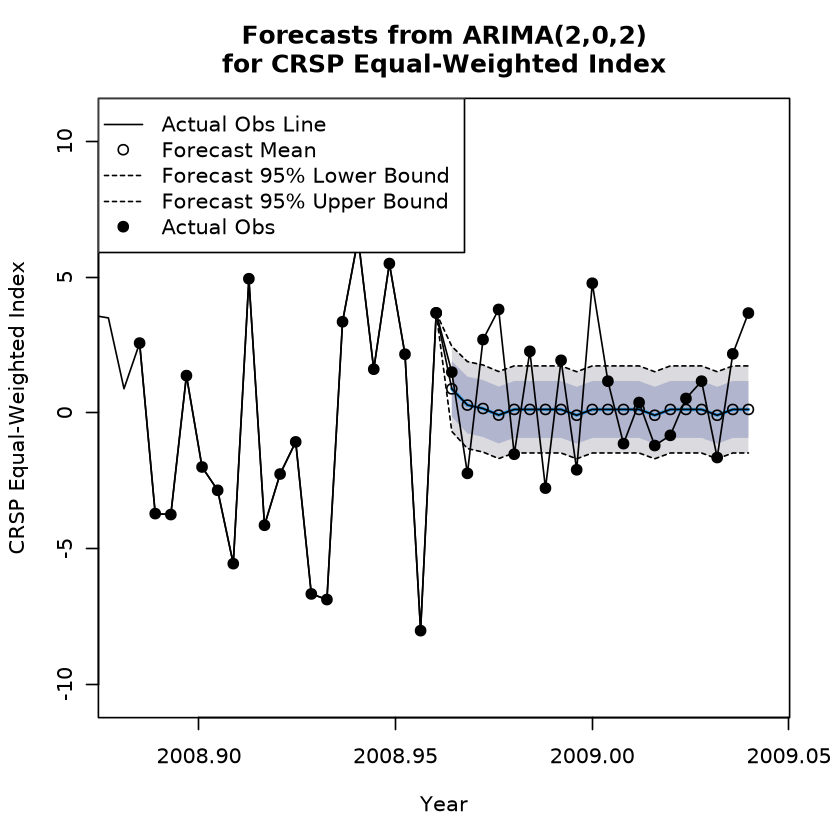

In [29]:
npts = 20
eotr = length(ew_ts)-npts
h = npts
freq = 252
xreg = as.matrix(da[, 8:11])
ew_vanilla_fc_res = plot_auto_arima_forecast_fig(
    da_ts=ew_ts, eotr=eotr, h=h, npts=npts, frequency=freq,
    xreg=xreg,
    main="Forecasts from ARIMA(1,0,0)\nfor CRSP Equal-Weighted Index",
    xlab="Year", ylab="CRSP Equal-Weighted Index", # ylim=c(5, 11)
    ts_fc_res=ew_vanilla_fc_res
)

#### Specify parameters

[1] 7299
2008.881 ; 2009.044

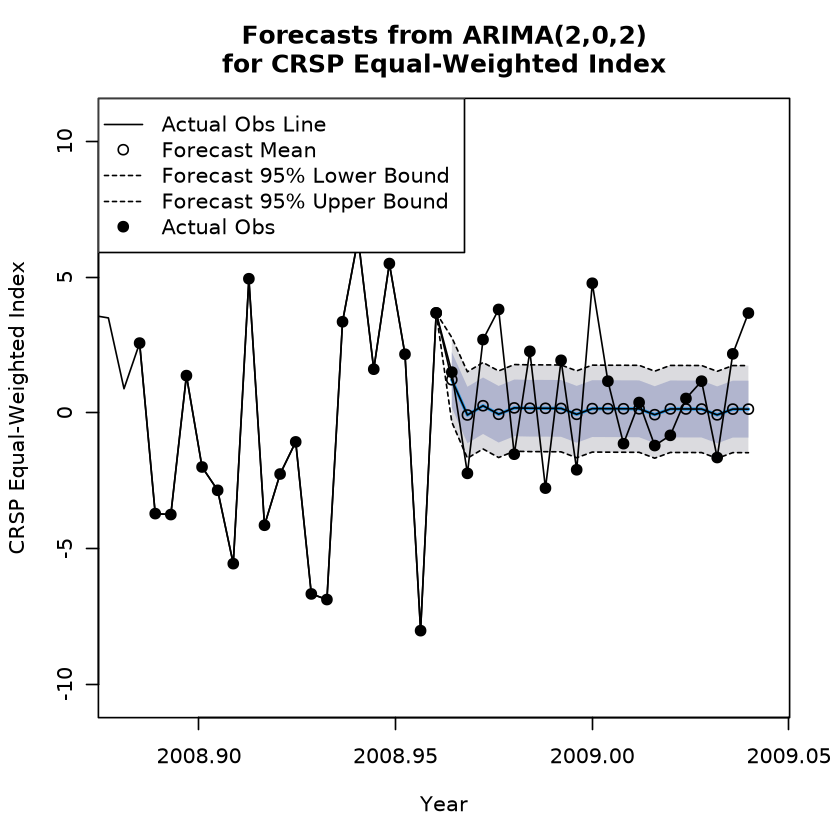

In [34]:
npts = 20
eotr = length(ew_ts)-npts
h = npts
freq = 252
xreg = as.matrix(da[, 8:11])
ew_fc_res = plot_auto_arima_forecast_fig(
    da_ts=ew_ts, eotr=eotr, h=h, npts=npts, frequency=freq,
    xreg=xreg,
    main="Forecasts from ARIMA(2,0,2)\nfor CRSP Equal-Weighted Index",
    xlab="Year", ylab="CRSP Equal-Weighted Index", # , ylim=c(5, 11)
    d = 0,
    D = 0,
    max.p = 2,
    max.q = 2,
    max.P = 1,
    max.Q = 0,
    max.order = 5,
    seasonal = TRUE,
    method = "ML",
    allowmean = TRUE,
    stepwise = FALSE,
    parallel = TRUE,
    num.cores = 12
)

In [35]:
ew_fc_tb = comb_forecast_res(ew_fc_res, ew_ts, eotr, freq)
ew_fc_tb


Forecast method: Regression with ARIMA(2,0,2) errors

Model Information:
Series: tr_da_ts 
Regression with ARIMA(2,0,2) errors 

Coefficients:
         ar1     ar2      ma1      ma2  intercept     xreg
      0.6345  0.2439  -0.4284  -0.3558     0.1210  -0.2138
s.e.  0.0957  0.0688   0.0940   0.0550     0.0171   0.0223

sigma^2 = 0.6333:  log likelihood = -8686.85
AIC=17387.7   AICc=17387.71   BIC=17435.96

Error measures:
                        ME      RMSE       MAE      MPE     MAPE      MASE
Training set -4.363483e-05 0.7954851 0.4998928 71.13892 219.0767 0.6848859
                     ACF1
Training set 0.0007334732

Forecasts:
         Point Forecast      Lo 80     Hi 80      Lo 95    Hi 95
2008.964     1.21423091  0.1943564 2.2341054 -0.3455325 2.773994
2008.968    -0.08311427 -1.1244231 0.9581946 -1.6756588 1.509430
2008.972     0.25810278 -0.7833839 1.2995895 -1.3347137 1.850919
2008.976    -0.05555079 -1.0989700 0.9878685 -1.6513228 1.540221
2008.980     0.17804337 -0.8663445

A Time Series:
 [1]  1.21423091 -0.08311427  0.25810278 -0.05555079  0.17804337  0.16626570
 [7]  0.16362949  0.15908431 -0.05820351  0.15221081  0.14922717  0.14651778
[13]  0.14407092 -0.07190330  0.13985630  0.13804664  0.13641028 -0.07883022
[19]  0.13359262  0.13238276

A Time Series:
 [1] 0.7958123 0.8125376 0.8126764 0.8141844 0.8149402 0.8156637 0.8162282
 [8] 0.8166959 0.8170766 0.8173881 0.8176426 0.8178507 0.8180208 0.8181598
[15] 0.8182735 0.8183664 0.8184424 0.8185045 0.8185553 0.8185969

A Time Series:
 [1]  1.4960 -2.2343  2.6950  3.8066 -1.5286  2.2634 -2.7784  1.9321 -2.1021
[10]  4.7713  1.1627 -1.1401  0.3764 -1.2094 -0.8332  0.5254  1.1629 -1.6514
[19]  2.1692  3.6731

,Forecast,Std. Error,Actual
2008.964,1.21423091,0.7958123,1.4960
2008.968,-0.08311427,0.8125376,-2.2343
2008.972,0.25810278,0.8126764,2.6950
2008.976,-0.05555079,0.8141844,3.8066
2008.980,0.17804337,0.8149402,-1.5286
2008.984,0.16626570,0.8156637,2.2634
2008.988,0.16362949,0.8162282,-2.7784
2008.992,0.15908431,0.8166959,1.9321
2008.996,-0.05820351,0.8170766,-2.1021
2009.000,0.15221081,0.8173881,4.7713


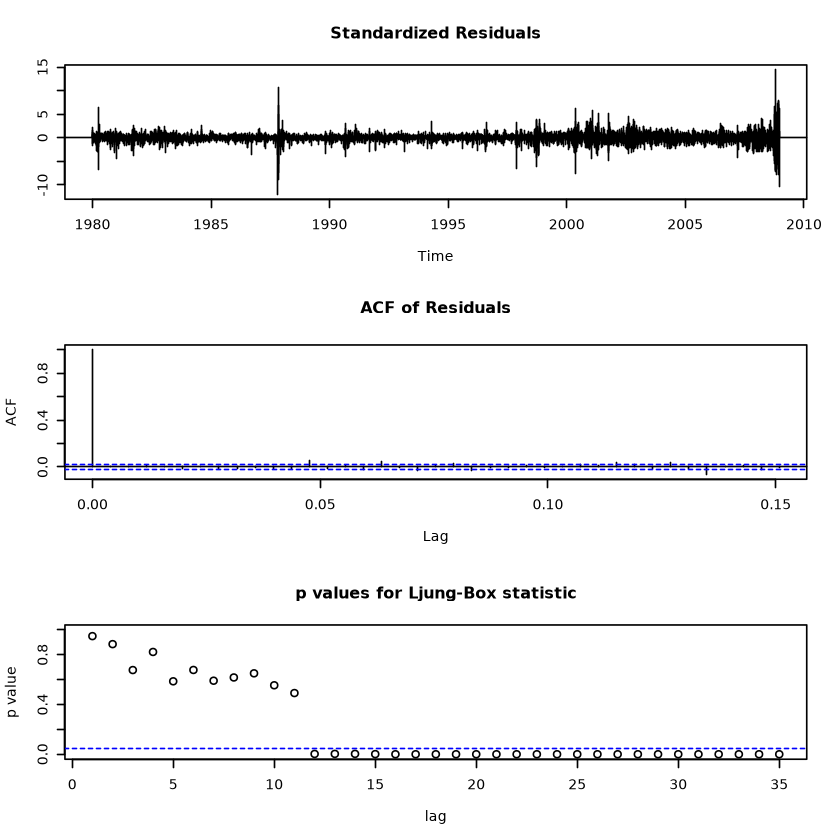

In [36]:
tsdiag(ew_fc_res$model, gof = 35)

[1] 7299
2008.881 ; 2009.044

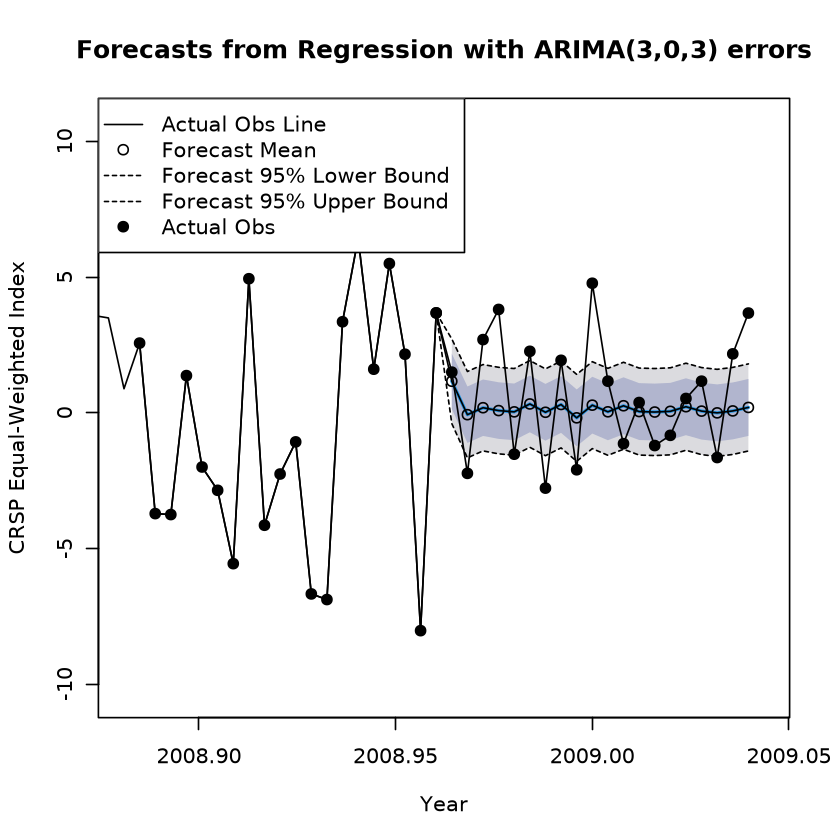

In [37]:
# npts = 20
# eotr = length(ew_ts)-npts
# h = npts
# freq = 252
# xreg = as.matrix(da[, 8:11])
# ew_fc_res_1 = plot_auto_arima_forecast_fig(
#     da_ts=ew_ts, eotr=eotr, h=h, npts=npts, frequency=freq,
#     xreg=xreg,
#     main=NULL, # "Forecasts from ARIMA(2,0,2)\nfor CRSP Equal-Weighted Index",
#     xlab="Year", ylab="CRSP Equal-Weighted Index", # , ylim=c(5, 11)
#     d = 0,
#     D = 0,
#     max.p = 4,
#     max.q = 4,
#     max.P = 2,
#     max.Q = 2,
#     max.order = 10,
#     seasonal = TRUE,
#     method = "ML",
#     allowmean = TRUE,
#     stepwise = FALSE,
#     parallel = TRUE,
#     num.cores = 12
# )

In [38]:
# ew_fc_tb_1 = comb_forecast_res(ew_fc_res_1, ew_ts, eotr, freq)
# ew_fc_tb_1


Forecast method: Regression with ARIMA(3,0,3) errors

Model Information:
Series: tr_da_ts 
Regression with ARIMA(3,0,3) errors 

Coefficients:
          ar1     ar2     ar3     ma1      ma2      ma3  intercept     xreg
      -0.4405  0.8290  0.3449  0.6459  -0.7276  -0.4438     0.1205  -0.2123
s.e.   0.1066  0.0452  0.0731  0.1041   0.0658   0.0572     0.0171   0.0222

sigma^2 = 0.6325:  log likelihood = -8681.24
AIC=17380.47   AICc=17380.5   BIC=17442.53

Error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set 3.931061e-05 0.7948726 0.4997248 73.55663 215.3975 0.6846557
                    ACF1
Training set 0.003102916

Forecasts:
         Point Forecast      Lo 80     Hi 80      Lo 95    Hi 95
2008.964    1.159541374  0.1403125 2.1787703 -0.3992347 2.718317
2008.968   -0.071681356 -1.1121891 0.9688264 -1.6630006 1.519638
2008.972    0.184549390 -0.8560176 1.2251164 -1.4068605 1.775959
2008.976    0.079094698 -0.9636827 1.1218721 -1.5156

A Time Series:
 [1]  1.159541374 -0.071681356  0.184549390  0.079094698  0.032036475
 [6]  0.323237844  0.016826346  0.303722391 -0.188507466  0.279227783
[11]  0.033631309  0.256994564  0.043127871  0.025469665  0.051797204
[16]  0.221296763  0.059610922 -0.005116928  0.066619644  0.195098197

A Time Series:
 [1] 0.7953085 0.8119125 0.8119587 0.8136836 0.8146765 0.8151987 0.8161192
 [8] 0.8163890 0.8170533 0.8172150 0.8176738 0.8177736 0.8180882 0.8181499
[15] 0.8183655 0.8184035 0.8185515 0.8185747 0.8186765 0.8186905

A Time Series:
 [1]  1.4960 -2.2343  2.6950  3.8066 -1.5286  2.2634 -2.7784  1.9321 -2.1021
[10]  4.7713  1.1627 -1.1401  0.3764 -1.2094 -0.8332  0.5254  1.1629 -1.6514
[19]  2.1692  3.6731

,Forecast,Std. Error,Actual
2008.964,1.159541374,0.7953085,1.4960
2008.968,-0.071681356,0.8119125,-2.2343
2008.972,0.184549390,0.8119587,2.6950
2008.976,0.079094698,0.8136836,3.8066
2008.980,0.032036475,0.8146765,-1.5286
2008.984,0.323237844,0.8151987,2.2634
2008.988,0.016826346,0.8161192,-2.7784
2008.992,0.303722391,0.8163890,1.9321
2008.996,-0.188507466,0.8170533,-2.1021
2009.000,0.279227783,0.8172150,4.7713


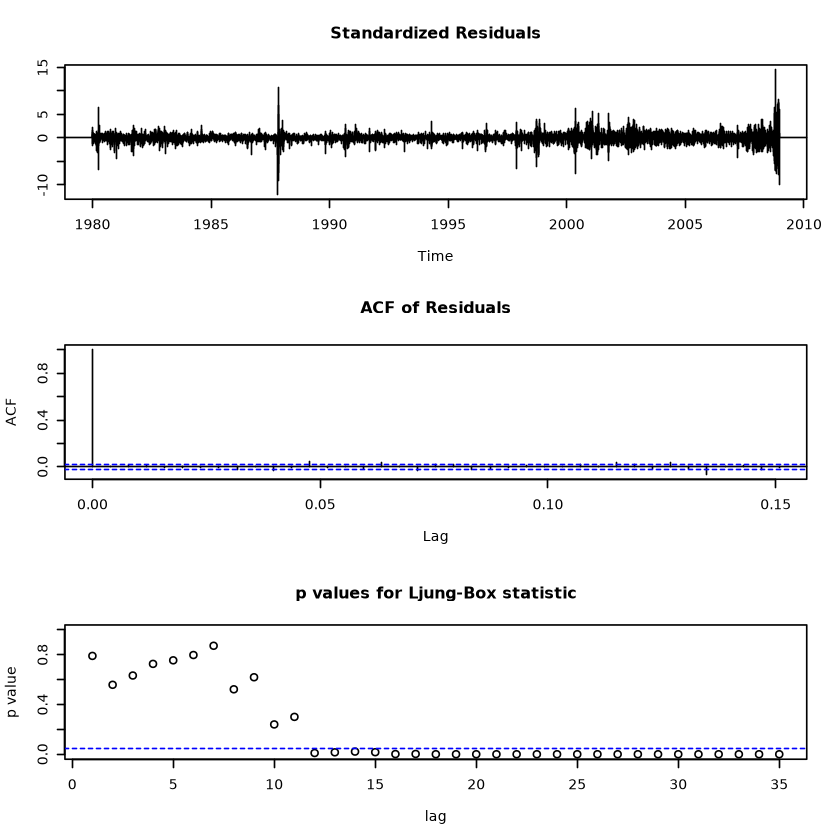

In [39]:
# tsdiag(ew_fc_res_1$model, gof = 35)

### Single cpu

In [22]:
sp_ts_fm <- auto.arima(
    ew_ts,
    d = 0,
    D = 0,
    max.p = 2,
    max.q = 2,
    max.P = 1,
    max.Q = 0,
    max.order = 5,
    seasonal = TRUE,
    method = "ML",
    allowmean = TRUE,
    xreg = as.matrix(da[, 8:11]),
)
sp_ts_fm

Series: ew_ts 
Regression with ARIMA(2,0,2) errors 

Coefficients:
         ar1     ar2      ma1      ma2  intercept        M        T        W
      0.6224  0.2507  -0.4249  -0.3517     0.2250  -0.3181  -0.1989  -0.1059
s.e.  0.0948  0.0685   0.0931   0.0551     0.0243   0.0275   0.0291   0.0293
            R
      -0.0997
s.e.   0.0271

sigma^2 = 0.6429:  log likelihood = -8764.09
AIC=17548.19   AICc=17548.22   BIC=17617.17